In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import streamlit as st
from sklearn.impute import SimpleImputer


In [ ]:
from google.colab import files

uploaded = files.upload()
file_name = 'private_cars_data.csv'
df = pd.read_csv(file_name, sep=';')
df.head()


Saving private_cars_data.csv to private_cars_data.csv


,Brand,Model,Body_Type,Year,Price,Mileage,Engine_Size,Horsepower,Fuel_Type,Gender,Marital_Status,Has_Children,Social_Status
0,Nissan,Altima,Sedan,2018,47799,73586,"2,5",216,Electric,Male,Married,3,3
1,Toyota,Camry,Sedan,2019,32170,69260,"2,5",143,Petrol,Female,Single,2,3
2,Hyundai,Santa Fe,Sedan,2020,38624,6061,"1,8",236,Petrol,Female,Married,3,4
3,Hyundai,Sonata,Sedan,2021,41929,89907,NaN,243,Petrol,Female,Married,3,3
4,Toyota,Corolla,Sedan,2021,32205,29275,2,103,Petrol,Male,Married,2,5


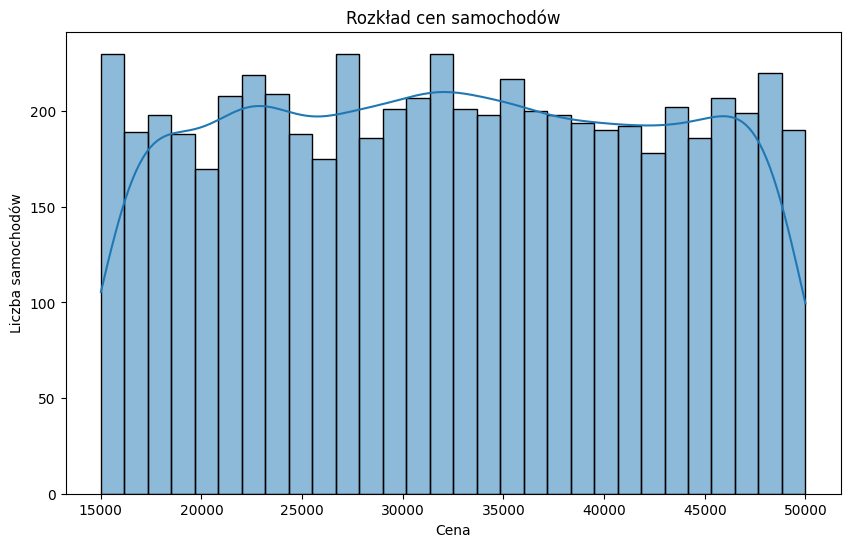

In [ ]:
# distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Rozkład cen samochodów')
plt.xlabel('Cena')
plt.ylabel('Liczba samochodów')
plt.show()

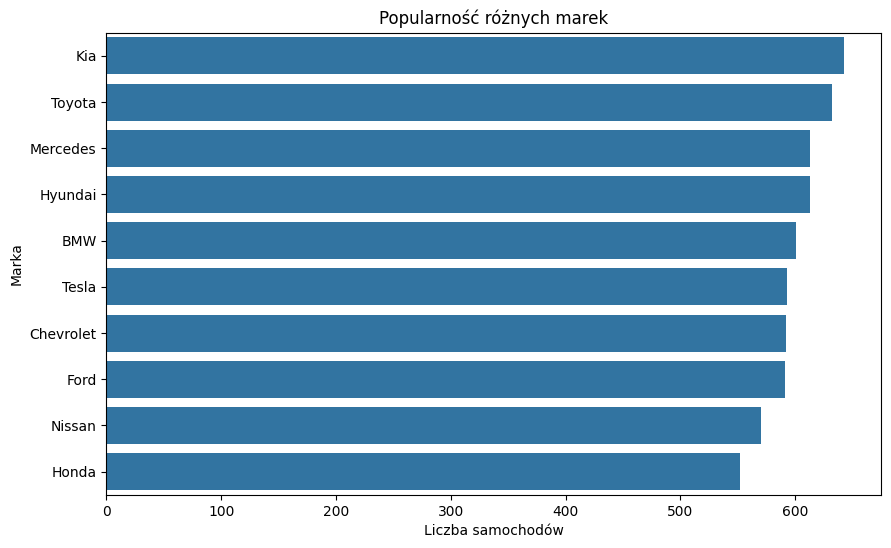

In [ ]:
# popularity of different brands
plt.figure(figsize= (10,6))
sns.countplot(df['Brand'], order= df['Brand'].value_counts().index)
plt.title('Popularność różnych marek')
plt.xlabel('Liczba samochodów')
plt.ylabel('Marka')
plt.show()


In [ ]:
# label encoding
label_encoders = {}
for column in ['Brand', 'Model', 'Body_Type', 'Fuel_Type', 'Gender', 'Marital_Status']:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [ ]:
# Replacing missing values with zero
imputer = SimpleImputer(strategy='constant', fill_value=0)
df[['Price', 'Mileage', 'Engine_Size', 'Horsepower', 'Social_Status']] = imputer.fit_transform(df[['Price', 'Mileage', 'Engine_Size', 'Horsepower', 'Social_Status']])

In [ ]:
# Changing commas to dots and converting to float and replacing missing data with zeros
df['Engine_Size'] = df['Engine_Size'].astype(str).str.replace(',', '.').astype(float).fillna(0)

In [ ]:
# feature scaling
scaler = StandardScaler()
df[['Price', 'Mileage', 'Engine_Size', 'Horsepower', 'Social_Status']] = scaler.fit_transform(df[['Price', 'Mileage', 'Engine_Size', 'Horsepower', 'Social_Status']])


In [ ]:
X = df.drop(columns=['Brand'])
y = df['Brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Building and training a recommendation model**

In [ ]:
# Building a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8391666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.80      0.68      0.74       114
           2       0.86      0.95      0.90       119
           3       0.51      0.71      0.59       105
           4       0.83      0.71      0.77       121
           5       0.99      1.00      1.00       128
           6       0.79      0.80      0.79       134
           7       0.78      0.66      0.71       114
           8       0.98      1.00      0.99       118
           9       0.92      0.85      0.88       130

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.85      0.84      0.84      1200



## **Optimization:**

In [ ]:
# Defining the parameter grid:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
# Hyperparameter optimization
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Best parameters
print('Best Parameters:', grid_search.best_params_)

# Evaluation of the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print('Best Model Accuracy:', accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 0.8608333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       0.86      0.74      0.79       114
           2       0.84      0.98      0.91       119
           3       0.51      0.72      0.60       105
           4       0.91      0.77      0.83       121
           5       1.00      1.00      1.00       128
           6       0.78      0.76      0.77       134
           7       0.86      0.75      0.80       114
           8       1.00      1.00      1.00       118
           9       0.93      0.87      0.90       130

    accuracy                           0.86      1200
   macro avg       0.87      0.86      0.86      1200
weighted avg       0.87      0.86      0.86      1200

